In [48]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from termcolor import colored

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

float32
float32


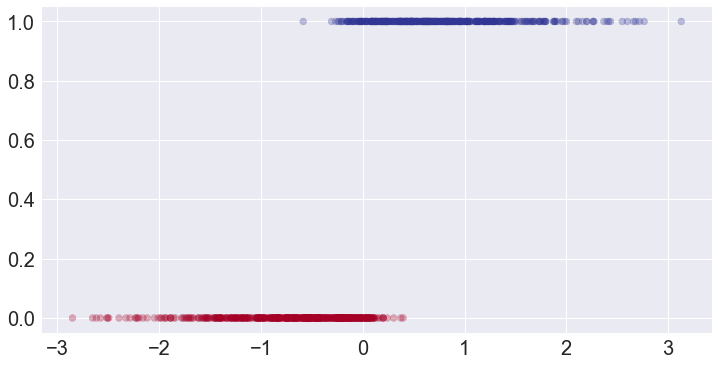

In [50]:
n_train = 1000
train_x = np.random.normal(0,1,size = (n_train,1)).astype(np.float32)
x_train_noise = train_x + (0.2 * np.random.normal(0,1,size = (n_train,1))).astype(np.float32)

#train_x_noise를 기준으로 classify한다
train_y = (x_train_noise>=0).astype(np.float32)

print(train_x.dtype)
print(train_y.dtype)

#plotting
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(train_x,train_y, c = train_y, cmap = "RdYlBu", alpha = 0.3)
ax.tick_params(labelsize = 20)


In [51]:
#tensorflow를 위한 dataset만들기 -> for mini-batch gradient

#Creates a `Dataset` whose elements are slices of the given tensors.
train_ds = tf.data.Dataset.from_tensor_slices((train_x,train_y))

#Randomly shuffles the elements of this dataset.
train_ds = train_ds.shuffle(n_train).batch(8)

# Without Resetting train_loss, train_acc

In [44]:
#define model
model = Sequential()
model.add(Dense(units = 2, 
                activation = "softmax"))

#loss, optimizer
loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate = 1)

#record mean of loss and acc
train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

#constant
EPOCHS = 10

for epoch in range(EPOCHS):
    for x,y in train_ds:
        #make forward prop for current mini-batch
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y,predictions)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
      
        # to compute the mean loss/acc of the current epoch, acculate the result into train_loss/train_acc     
        train_loss(loss)
        train_acc(y,predictions)

    template = "Train loss: {:.4f}\tTrain Acc:{:.2f}%"        
    print(colored("EPOCH{}\n".format(epoch+1), "grey", "on_cyan"), 
          template.format(train_loss.result(),train_acc.result()*100), "\n")

EPOCH1
 Train loss: 0.2122	Train Acc:90.90% 

EPOCH2
 Train loss: 0.1897	Train Acc:91.40% 

EPOCH3
 Train loss: 0.1812	Train Acc:91.63% 

EPOCH4
 Train loss: 0.1769	Train Acc:91.93% 

EPOCH5
 Train loss: 0.1744	Train Acc:91.98% 

EPOCH6
 Train loss: 0.1728	Train Acc:91.92% 

EPOCH7
 Train loss: 0.1716	Train Acc:91.96% 

EPOCH8
 Train loss: 0.1708	Train Acc:92.00% 

EPOCH9
 Train loss: 0.1703	Train Acc:91.98% 

EPOCH10
 Train loss: 0.1697	Train Acc:92.00% 



In [40]:
#하지막 치명적인 문제가 있다 -> reset을 해주지 않으면 계속 각 epoch에 대한 누적 평균을 계산함 

train_loss = Mean()

loss_1 = tf.constant(1)
train_loss(loss_1)
print(train_loss.result())

loss_2 = tf.constant(2)
train_loss(loss_2)
print(train_loss.result())

loss_3 = tf.constant(3)
train_loss(loss_3)
print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


# With Resets

In [72]:
#define model
model = Sequential()
model.add(Dense(units = 2, 
                activation = "softmax"))

#loss, optimizer
loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate = 1)

#record mean of loss and acc
train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

#constant
EPOCHS = 10

for epoch in range(EPOCHS):
    for x,y in train_ds:
        #make forward prop for current mini-batch
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y,predictions)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
      
        # to compute the mean loss/acc of the current epoch, acculate the result into train_loss/
        train_loss(loss)
        train_acc(y,predictions)

    template = "Train loss: {:.4f}\tTrain Acc:{:.2f}%"        
    print(colored("EPOCH{}\n".format(epoch+1), "grey", "on_cyan"), 
          template.format(train_loss.result(),train_acc.result()*100), "\n")
    
    train_loss.reset_states()
    train_acc.reset_states()

EPOCH1
 Train loss: 0.2037	Train Acc:91.60% 

EPOCH2
 Train loss: 0.1648	Train Acc:92.50% 

EPOCH3
 Train loss: 0.1635	Train Acc:92.60% 

EPOCH4
 Train loss: 0.1595	Train Acc:92.70% 

EPOCH5
 Train loss: 0.1621	Train Acc:92.70% 

EPOCH6
 Train loss: 0.1615	Train Acc:92.80% 

EPOCH7
 Train loss: 0.1633	Train Acc:92.10% 

EPOCH8
 Train loss: 0.1636	Train Acc:92.80% 

EPOCH9
 Train loss: 0.1623	Train Acc:92.80% 

EPOCH10
 Train loss: 0.1619	Train Acc:92.10% 

